In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn import preprocessing
import scipy.stats as stats

C:\Users\musta\AppData\Local\Temp\ipykernel_1988\3628895271.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("hazırlandiii.csv",index_col=0)

In [3]:
df.head()

,Adres bilgisi_ Arnavutköy,Adres bilgisi_ Ataşehir,Adres bilgisi_ Avcılar,Adres bilgisi_ Bahçelievler,Adres bilgisi_ Bakırköy,Adres bilgisi_ Bayrampaşa,Adres bilgisi_ Bağcılar,Adres bilgisi_ Başakşehir,Adres bilgisi_ Beykoz,Adres bilgisi_ Beylikdüzü,...,İlan Fiyatı,Konut büyüklüğü,İlanın koyulma tarihi,boğaza_bakan,metroya_yakınlık,teraslı_olması,esyalı_olması,bahceli_olması,oda_sayısı,salon_sayısı
0,False,False,False,False,False,False,False,False,False,False,...,12000,65,1,0,0,0,0,0,1.0,1.0
1,False,False,False,False,False,False,False,True,False,False,...,9000,85,1,0,0,0,0,1,2.0,1.0
2,False,False,False,False,False,False,False,False,False,False,...,13000,90,1,0,0,0,0,0,1.0,1.0
3,False,False,False,False,False,False,False,False,False,False,...,15000,135,1,0,0,0,0,0,3.0,1.0
4,False,False,False,False,False,False,False,False,False,False,...,10000,75,1,0,0,0,0,0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1422 entries, 0 to 1499
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Adres bilgisi_ Arnavutköy      1422 non-null   bool   
 1   Adres bilgisi_ Ataşehir        1422 non-null   bool   
 2   Adres bilgisi_ Avcılar         1422 non-null   bool   
 3   Adres bilgisi_ Bahçelievler    1422 non-null   bool   
 4   Adres bilgisi_ Bakırköy        1422 non-null   bool   
 5   Adres bilgisi_ Bayrampaşa      1422 non-null   bool   
 6   Adres bilgisi_ Bağcılar        1422 non-null   bool   
 7   Adres bilgisi_ Başakşehir      1422 non-null   bool   
 8   Adres bilgisi_ Beykoz          1422 non-null   bool   
 9   Adres bilgisi_ Beylikdüzü      1422 non-null   bool   
 10  Adres bilgisi_ Beyoğlu         1422 non-null   bool   
 11  Adres bilgisi_ Beşiktaş        1422 non-null   bool   
 12  Adres bilgisi_ Büyükçekmece    1422 non-null   bool  

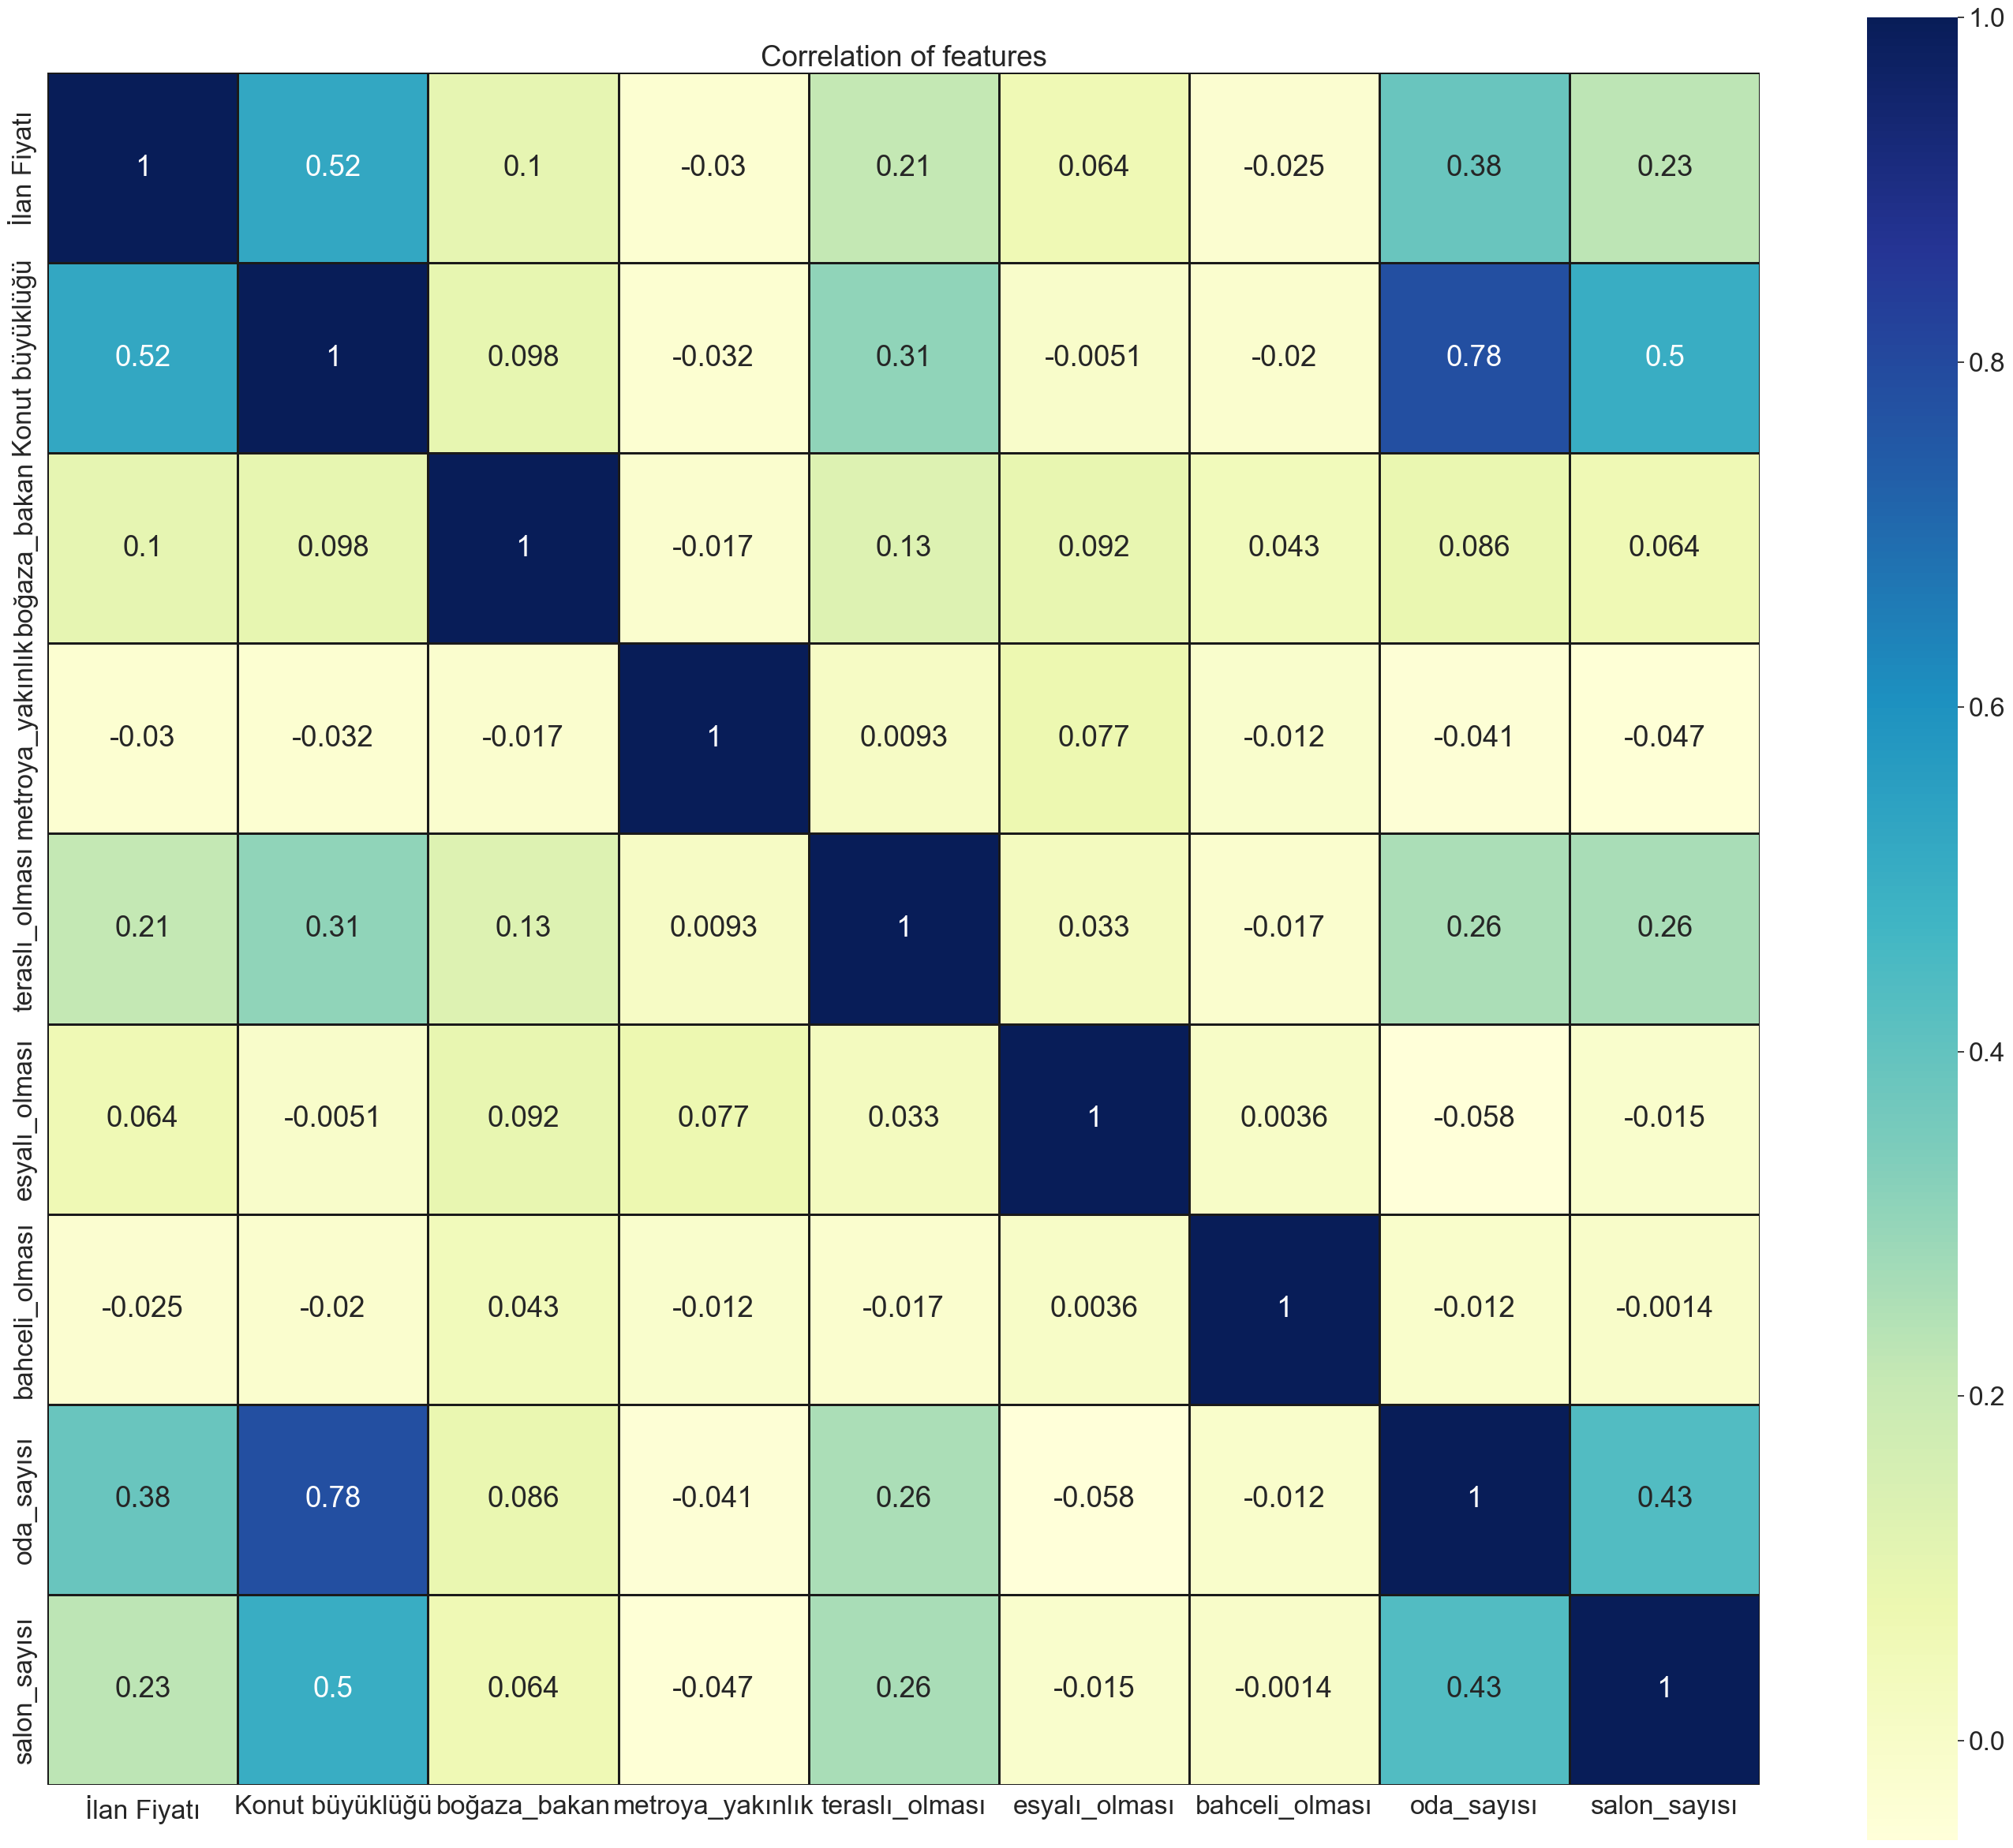

In [5]:
df2=pd.concat([df["İlan Fiyatı"],df["Konut büyüklüğü"],df["boğaza_bakan"],df["metroya_yakınlık"],df["teraslı_olması"]
              ,df["esyalı_olması"],df["bahceli_olması"],df["oda_sayısı"],df["salon_sayısı"]],axis=1)
sns.set(font_scale=2.2)
fig,ax=plt.subplots(figsize=(35,30))
plt.title("Correlation of features")
sns.heatmap(df2.corr(),linewidths=2.0,vmax=1.0,square=True,cmap="YlGnBu",linecolor="k",annot=True);

In [6]:
y,X=np.log(df2["İlan Fiyatı"]),sm.add_constant(df2[["Konut büyüklüğü","boğaza_bakan","metroya_yakınlık","teraslı_olması"
              ,"esyalı_olması","bahceli_olması","oda_sayısı","salon_sayısı"]])
lm_ols_2=sm.OLS(y,X,data=df2)
fit_ols_2=lm_ols_2.fit()
fit_ols_2.summary()

C:\Users\musta\anaconda3\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            İlan Fiyatı   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     72.46
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          4.85e-100
Time:                        14:58:14   Log-Likelihood:                -930.93
No. Observations:                1422   AIC:                             1880.
Df Residuals:                    1413   BIC:                             1927.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.0875      0.055    164.192      0.000       8.979       9.196
Konut büyüklüğü      0.0049      0.000     11.575      0.000       0.004       0.006
boğaza_bakan         0.2106      0.096      2.199      0.028       0.023       0.399
metroya_yakınlık    -0.1086      0.099     -1.101      0.271      -0.302       0.085
teraslı_olması       0.0902      0.076      1.182      0.237      -0.059       0.240
esyalı_olması        0.2376      0.050      4.756      0.000       0.140       0.336
bahceli_olması      -0.2552      0.130     -1.958      0.050      -0.511       0.001
oda_sayısı           0.0537      0.023      2.369      0.018       0.009       0.098
salon_sayısı        -0.0070      0.059     -0.119      0.906      -0.123       0.109
==============================================================================
Omnibus:                      186.586   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              504.950
Skew:                           0.699   Prob(JB):                    2.25e-110
Kurtosis:                       5.562   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Cond. no. değeri çok yüksek bu modelimizde çoklu doğrusallık problemini (bazı bağımsız değişkenlerin kendi arasında yüksek korelasyona sahip olduğunu söyler)
Bu durumda ya birbirilye yüksek korelasyona sahip degiskenleri cıkarmalıyız ya da Ridge regresyon modelini kullanabiliriz.

# Regresyon Modelleri

In [7]:
def split_and_validate(X,y):
    #perform train/val split
    X_train , X_val , y_train , y_val=train_test_split(X, y , test_size=0.2, random_state=42)
#linear model

    lr_model=LinearRegression()
    lr_model.fit(X_train,y_train)
    
    val_score_lm = lr_model.score(X_val , y_val) #validation seti üzerinden doğruluk skoru

#poly

    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    lm_poly = LinearRegression()
    lm_poly.fit(X_train_poly,y_train)

    val_score_poly=lm_poly.score(X_val_poly,y_val)   #validation seti üzerinden doğruluk skoru

#Ridge
    ridge_model = Ridge(alpha=0.005)
    ridge_model.fit(X_train,y_train)

    val_score_ridge = ridge_model.score(X_val,y_val)   #validation seti üzerinden doğruluk skoru

#Lasso
    lasso_model=Lasso(alpha=0.005)
    lasso_model.fit(X_train , y_train)

    val_score_lasso=lasso_model.score(X_val , y_val)   #validation seti üzerinden doğruluk skoru

#CV

    kf=KFold(n_splits=10 , shuffle=True , random_state=42)


    print("\nValidation R^2 score of linear regression was:" ,np.mean(cross_val_score(lr_model,X_train,y_train,cv=kf , scoring='r2'))) #modelin genel performansının doğruluk değeri
    print("\nTest scores : ",val_score_lm)

    print("\nValidation R^2 score of Poly regression was:" ,np.mean(cross_val_score(lm_poly,X_train_poly,y_train,cv=kf , scoring='r2')))  #modelin genel performansının doğruluk değeri
    print("\nTest scores : ",val_score_poly)
    print("\nTrain scores :",lm_poly.score(X_train_poly,y_train))

    print("\nValidation R^2 score of Ridge regression was:" ,np.mean(cross_val_score(ridge_model,X_train,y_train,cv=kf , scoring='r2')))  #modelin genel performansının doğruluk değeri
    print("\nTest scores : ",val_score_ridge)

    print("\nValidation R^2 score of Lasso regression was:" ,np.mean(cross_val_score(lasso_model,X_train,y_train,cv=kf , scoring='r2')))  #modelin genel performansının doğruluk değeri
    print("\nTest scores : ",val_score_lasso)

# Kategorik değişkenler olmadan modeli kuralım:

In [8]:
y,X=np.log(df2["İlan Fiyatı"]),df2[["Konut büyüklüğü","boğaza_bakan","metroya_yakınlık","teraslı_olması"
              ,"esyalı_olması","bahceli_olması","oda_sayısı","salon_sayısı"]]
split_and_validate(X,y)


Validation R^2 score of linear regression was: 0.2301159692663995

Test scores :  0.3279382444848046

Validation R^2 score of Poly regression was: 0.08909601877794397

Test scores :  0.330851652608802

Train scores : 0.31485381228457543

Validation R^2 score of Ridge regression was: 0.23012112332322285

Test scores :  0.32793836636076723

Validation R^2 score of Lasso regression was: 0.23557672262234478

Test scores :  0.3176877282156725


# Şimdi kategorik değişkenleri de katalım

In [9]:
df.columns

Index(['Adres bilgisi_ Arnavutköy ', 'Adres bilgisi_ Ataşehir ',
       'Adres bilgisi_ Avcılar ', 'Adres bilgisi_ Bahçelievler ',
       'Adres bilgisi_ Bakırköy ', 'Adres bilgisi_ Bayrampaşa ',
       'Adres bilgisi_ Bağcılar ', 'Adres bilgisi_ Başakşehir ',
       'Adres bilgisi_ Beykoz ', 'Adres bilgisi_ Beylikdüzü ',
       'Adres bilgisi_ Beyoğlu ', 'Adres bilgisi_ Beşiktaş ',
       'Adres bilgisi_ Büyükçekmece ', 'Adres bilgisi_ Esenler ',
       'Adres bilgisi_ Esenyurt ', 'Adres bilgisi_ Eyüpsultan ',
       'Adres bilgisi_ Fatih ', 'Adres bilgisi_ Gaziosmanpaşa ',
       'Adres bilgisi_ Güngören ', 'Adres bilgisi_ Kadıköy ',
       'Adres bilgisi_ Kartal ', 'Adres bilgisi_ Kağıthane ',
       'Adres bilgisi_ Küçükçekmece ', 'Adres bilgisi_ Maltepe ',
       'Adres bilgisi_ Pendik ', 'Adres bilgisi_ Sancaktepe ',
       'Adres bilgisi_ Sarıyer ', 'Adres bilgisi_ Silivri ',
       'Adres bilgisi_ Sultanbeyli ', 'Adres bilgisi_ Sultangazi ',
       'Adres bilgisi_ Tuzla ', 'Adr

In [10]:
y,X=np.log(df["İlan Fiyatı"]),df.drop(columns=["İlan Fiyatı","Adres bilgisi_ Şişli ","Konut tipi_Yalı Dairesi"])
split_and_validate(X,y)


Validation R^2 score of linear regression was: 0.5194702598362815

Test scores :  0.5868861112221644

Validation R^2 score of Poly regression was: -2879871940487.778

Test scores :  -5425123794713754.0

Train scores : 0.7240392123831266

Validation R^2 score of Ridge regression was: 0.5194823431774596

Test scores :  0.5870021966938245

Validation R^2 score of Lasso regression was: 0.4587256159938691

Test scores :  0.5444913915944842


In [11]:
"""
Validation R^2 score of linear regression was: 0.5194702598362815
Validation R^2 score of Ridge regression was: 0.5194823431774596
Validation R^2 score of Lasso regression was: 0.4587256159938691
"""

'\nValidation R^2 score of linear regression was: 0.5194702598362815\nValidation R^2 score of Ridge regression was: 0.5194823431774596\nValidation R^2 score of Lasso regression was: 0.4587256159938691\n'

In [12]:
y, X = np.log(df["İlan Fiyatı"]), df.drop(columns=["İlan Fiyatı"])
X = sm.add_constant(X)
lm_ols_2 = sm.OLS(y, X.astype(float))
fit_ols_2 = lm_ols_2.fit()
fit_ols_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            İlan Fiyatı   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     38.92
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          1.43e-227
Time:                        14:58:30   Log-Likelihood:                -538.54
No. Observations:                1422   AIC:                             1181.
Df Residuals:                    1370   BIC:                             1455.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             7.9534      0.094     84.382      0.000       7.768       8.138
Adres bilgisi_ Arnavutköy        -0.1020      0.070     -1.448      0.148      -0.240       0.036
Adres bilgisi_ Ataşehir           0.2386      0.082      2.892      0.004       0.077       0.400
Adres bilgisi_ Avcılar           -0.2410      0.057     -4.266      0.000      -0.352      -0.130
Adres bilgisi_ Bahçelievler      -0.0250      0.037     -0.676      0.499      -0.098       0.048
Adres bilgisi_ Bakırköy           0.6393      0.103      6.225      0.000       0.438       0.841
Adres bilgisi_ Bayrampaşa         0.1833      0.095      1.926      0.054      -0.003       0.370
Adres bilgisi_ Bağcılar           0.0987      0.061      1.605      0.109      -0.022       0.219
Adres bilgisi_ Başakşehir         0.1465      0.055      2.678      0.007       0.039       0.254
Adres bilgisi_ Beykoz             0.3970      0.108      3.689      0.000       0.186       0.608
Adres bilgisi_ Beylikdüzü         0.0976      0.047      2.094      0.036       0.006       0.189
Adres bilgisi_ Beyoğlu            0.4193      0.072      5.812      0.000       0.278       0.561
Adres bilgisi_ Beşiktaş           0.8948      0.074     12.026      0.000       0.749       1.041
Adres bilgisi_ Büyükçekmece      -0.0769      0.063     -1.230      0.219      -0.200       0.046
Adres bilgisi_ Esenler            0.0070      0.093      0.075      0.940      -0.175       0.189
Adres bilgisi_ Esenyurt          -0.2337      0.030     -7.745      0.000      -0.293      -0.174
Adres bilgisi_ Eyüpsultan         0.2941      0.093      3.146      0.002       0.111       0.477
Adres bilgisi_ Fatih              0.1317      0.059      2.224      0.026       0.016       0.248
Adres bilgisi_ Gaziosmanpaşa      0.2350      0.051      4.635      0.000       0.136       0.334
Adres bilgisi_ Güngören          -0.0490      0.103     -0.477      0.633      -0.251       0.153
Adres bilgisi_ Kadıköy            0.8216      0.061     13.545      0.000       0.703       0.941
Adres bilgisi_ Kartal             0.2007      0.055      3.660      0.000       0.093       0.308
Adres bilgisi_ Kağıthane          0.3770      0.054      6.956      0.000       0.271       0.483
Adres bilgisi_ Küçükçekmece       0.0214      0.043      0.501      0.616      -0.062       0.105
Adres bilgisi_ Maltepe            0.5470      0.061      9.024      0.000       0.428       0.666
Adres bilgisi_ Pendik             0.2367      0.067      3.539      0.000       0.105       0.368
Adres bilgisi_ Sancaktepe         0.1049      0.058      1.821      0.069      -0.008       0.218
Adres bilgisi_ Sarıyer            0.4846      0.057      8.477      0.000       0.372       0.597
Adres bilgisi_ Silivri           -0.0512     

In [ ]:
#RESIDUAL TESTS FOR LINEAR REGRESSION

In [13]:
y,X=np.log(df["İlan Fiyatı"]),df.drop(columns=["İlan Fiyatı","Adres bilgisi_ Şişli ","Konut tipi_Yalı Dairesi"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#LR    
    
    # fit linear regression to training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
    
    
    # score fit model on validation data
val_score_lm = lr_model.score(X_test, y_test)
val_score_lm

0.5868861112221644

In [14]:
y_pred=lr_model.predict(X_test)

In [15]:
y_test=y_test.tolist()
y_pred=y_pred.tolist()

In [24]:
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_predict = pd.DataFrame(y_pred, columns=['predict'])
data=pd.DataFrame(y_pred,columns=["predict"])
data["resid"]=df_test["y_test"]-df_predict["predict"]

,predict,resid
0,9.111813,0.280849
1,9.416842,0.324126
2,10.246544,0.489852
3,9.259288,-0.154308
4,9.746556,0.380075
...,...,...
280,9.964665,-0.348859
281,9.419241,-0.208901
282,9.620962,-0.148258
283,10.749447,1.168944


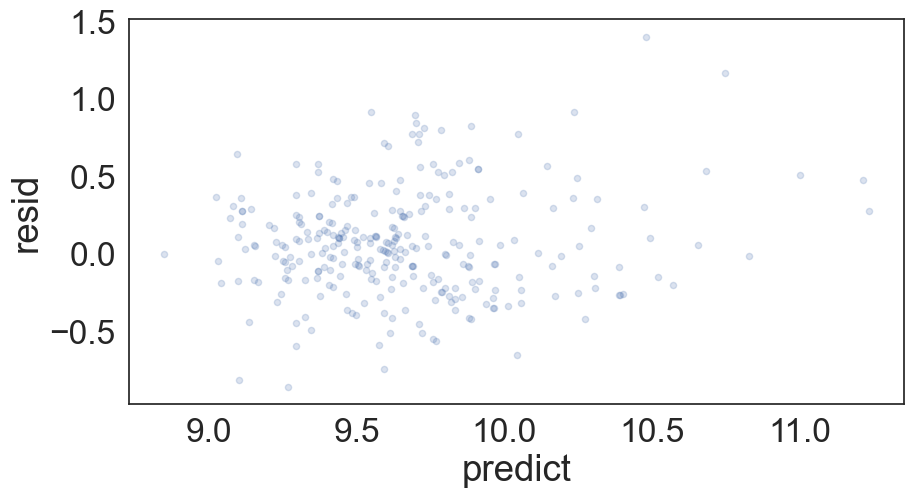

In [25]:
with sns.axes_style('white'):
    plot=data.plot(kind='scatter',x='predict',y='resid',alpha=0.2,figsize=(10,5))

In [26]:
#dağılımın regresyon modeli için uygun olduğunu görülüyor.
#Yani artıklar sıfır etrafında rasgele dağılmış ve iki paralel doğru arasında çok büyük sapmalar göstermeden salınım göstermişse ideal bir modeldir.

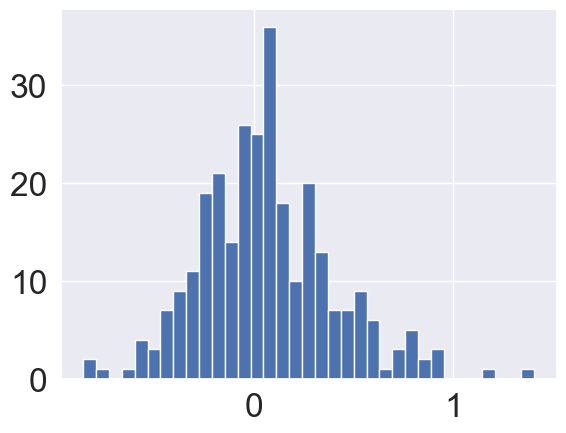

In [28]:
data["resid"].hist(bins=35); # Hatanın dağılımı

In [ ]:
#model tarafından üretilen artıkların yaklaşık olarak normal dağılımını göstermektedir.

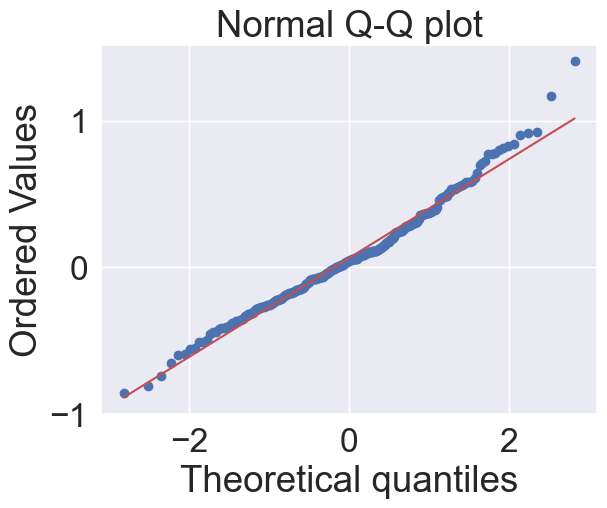

In [29]:
stats.probplot(data['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
#grafik normal dağılıma oldukça uygun.

In [33]:
from scipy.stats import shapiro

In [34]:
# normality test
stat, p = shapiro(data["resid"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Artıklar Normal dağılıma uymaz. (H0 reddedilemez)')
else:
	print('Artıklar normal dağılır. (H0 red)')

Statistics=0.983, p=0.002
Artıklar normal dağılır. (H0 red)


# Yaptığım 4 test sonucunda hepsinde aynı sonuca vardım artıklar normal dağılıyor ve regresyon veri setimiz için yaklaşık olarak uygun

En yüksek doğruluk değerini veren modeller Lineer Regresyon ve Ridge Regresyon oldu yaptığım testler sonucunda da modelin regresyon modeli için 
uygulanabilir olduğunu gördüm.Yukarıda ols modelinde cond no değeri çok yüksek çıkmıştı yani Ridge regresyon overfitting'e karşı daha dirençli
olduğu için bizim modelimiz Ridge regresyon.

# FINAL MODEL : RIDGE REGRESSION

In [49]:
y,X=np.log(df["İlan Fiyatı"]),df.drop(columns=["İlan Fiyatı","Adres bilgisi_ Şişli ","Konut tipi_Yalı Dairesi"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=0.005)
ridge_model.fit(X_train,y_train)
val_score_ridge = ridge_model.score(X_test,y_test)
val_score_ridge

0.5870021966938245